In [3]:
import pandas as pd
from helpers import *
import re 
import matplotlib

In [4]:
%%bash
cd output
ls

1ZoneUncontrolled_win_1_out
1ZoneUncontrolled_win_1_outoutput.xlsx
output.xlsx
schedule
simple


In [17]:
# data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Phd/eppyProject/output.xlsx')
df = pd.read_excel('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/output/1ZoneUncontrolled_win_1_out/output.xlsx')
# df = pd.read_csv('/home/paula/Documentos/Doctorado/Desarrollo/eppyProject/output/1ZoneUncontrolled_win_1_out/eplusout.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Date/Time                                                                     192 non-null    object 
 1   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):0  192 non-null    float64
 2   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):1  192 non-null    float64
 3   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):2  192 non-null    float64
 4   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):3  192 non-null    float64
 5   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):4  192 non-null    float64
dtypes: float64(5), object(1)
memory usa

In [19]:
sum(df['Date/Time'].duplicated())

0

In [20]:
len(df[df['Date/Time'].str.contains("07/21")])

96

In [21]:
len(df[df['Date/Time'].str.contains("01/01")])

0

In [22]:
# parse Date/TIme

new =  df['Date/Time'].str.split('  ', n=1, expand = True)
new[0] = new[0].str.replace('/','-')+'-00'
new[1] = new[1].str.replace('24','00') # TODO esto  tengo que hacerlo por regex si mis simulaciones son más cortas que una hora (osea, si por lo que sea tengo 24 minutos)


In [23]:
new

,0,1
0,12-21-00,00:15:00
1,12-21-00,00:30:00
2,12-21-00,00:45:00
3,12-21-00,01:00:00
4,12-21-00,01:15:00
...,...,...
187,07-21-00,23:00:00
188,07-21-00,23:15:00
189,07-21-00,23:30:00
190,07-21-00,23:45:00


In [24]:
df['Date/Time'] = new[0].str.cat(new[1], sep = " ")
df['Date/Time'] = df['Date/Time'].str.strip()

In [25]:
df

,Date/Time,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):0,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):1,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):2,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):3,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):4
0,12-21-00 00:15:00,0.0,0.0,0.0,0.0,0.0
1,12-21-00 00:30:00,0.0,0.0,0.0,0.0,0.0
2,12-21-00 00:45:00,0.0,0.0,0.0,0.0,0.0
3,12-21-00 01:00:00,0.0,0.0,0.0,0.0,0.0
4,12-21-00 01:15:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
187,07-21-00 23:00:00,0.0,0.0,0.0,0.0,0.0
188,07-21-00 23:15:00,0.0,0.0,0.0,0.0,0.0
189,07-21-00 23:30:00,0.0,0.0,0.0,0.0,0.0
190,07-21-00 23:45:00,0.0,0.0,0.0,0.0,0.0


In [26]:
df = df.set_index('Date/Time')

In [27]:
df.head()

,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):0,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):1,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):2,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):3,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):4
Date/Time,,,,,
12-21-00 00:15:00,0.0,0.0,0.0,0.0,0.0
12-21-00 00:30:00,0.0,0.0,0.0,0.0,0.0
12-21-00 00:45:00,0.0,0.0,0.0,0.0,0.0
12-21-00 01:00:00,0.0,0.0,0.0,0.0,0.0
12-21-00 01:15:00,0.0,0.0,0.0,0.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 12-21-00 00:15:00 to 07-21-00 00:00:00
Data columns (total 5 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):0  192 non-null    float64
 1   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):1  192 non-null    float64
 2   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):2  192 non-null    float64
 3   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):3  192 non-null    float64
 4   ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):4  192 non-null    float64
dtypes: float64(5)
memory usage: 9.0+ KB


In [29]:
df.index = pd.to_datetime(df.index, format = '%m-%d-%y %H:%M:%S')
# data['Date/Time'].to_datetime('%m-%d-%y %H:%M:%S')

In [30]:
df

,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):0,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):1,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):2,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):3,ZONE ONE:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep):4
Date/Time,,,,,
2000-12-21 00:15:00,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:30:00,0.0,0.0,0.0,0.0,0.0
2000-12-21 00:45:00,0.0,0.0,0.0,0.0,0.0
2000-12-21 01:00:00,0.0,0.0,0.0,0.0,0.0
2000-12-21 01:15:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2000-07-21 23:00:00,0.0,0.0,0.0,0.0,0.0
2000-07-21 23:15:00,0.0,0.0,0.0,0.0,0.0
2000-07-21 23:30:00,0.0,0.0,0.0,0.0,0.0


AttributeError: 'AxesSubplot' object has no attribute 'show'

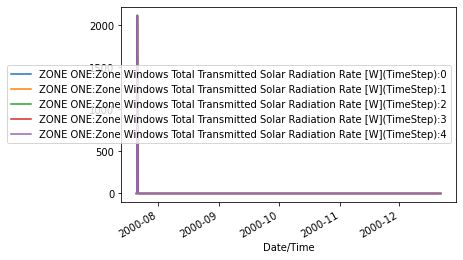

In [33]:
df.plot().show()